# Slices and Projections with 10^4 HiRes run

Including density slices and projections, temperature slices, ...

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import h5py
import matplotlib.pyplot as plt
import unyt as u

import richio
richio.plots.use_nice_style()

Box sizes

In [2]:
beta = 1
mstar = .5 * richio.units.mscale
rstar = .47 * richio.units.lscale
mbh = 10**4 * richio.units.mscale
rt = rstar * (mbh/mstar)**(1/3)

ra = rt**2 / rstar #2 * Rt * (Mbh/mstar)**(1/3)

nozzle_box = u.unyt_array([-3*rt, -3*rt, -2*rt, 3*rt, 3*rt, 2*rt])
big_box = u.unyt_array([-6*ra, -4*ra, -2*ra, 2.5*ra, 3*ra, 2*ra])
# else_box = u.unyt_array([-3*ra, -2*ra, -0.8*ra, 2*ra, 2*ra, 0.8*ra])

In [3]:
rsch = 2 * mbh / u.c**2
print(rsch.in_base('rich'))             # the Schwarzschild radius 

0.04243435693650459 code_mass*code_time**2/code_length**2


Read data (won't read the data to ram now)

In [3]:
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_21'
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_76'
path = '/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_118'

snap = richio.load(path)

In [5]:
print(snap.keys())

['CMx', 'CMy', 'CMz', 'Den', 'Diss', 'Entropy', 'IE', 'Mass', 'P', 'Rad', 'Star', 'T', 'Vol', 'Vx', 'Vy', 'Vz', 'box', 'tfb']


In [6]:
snap.tfb

unyt_quantity(1.69099747, 'code_time')

## Density projection

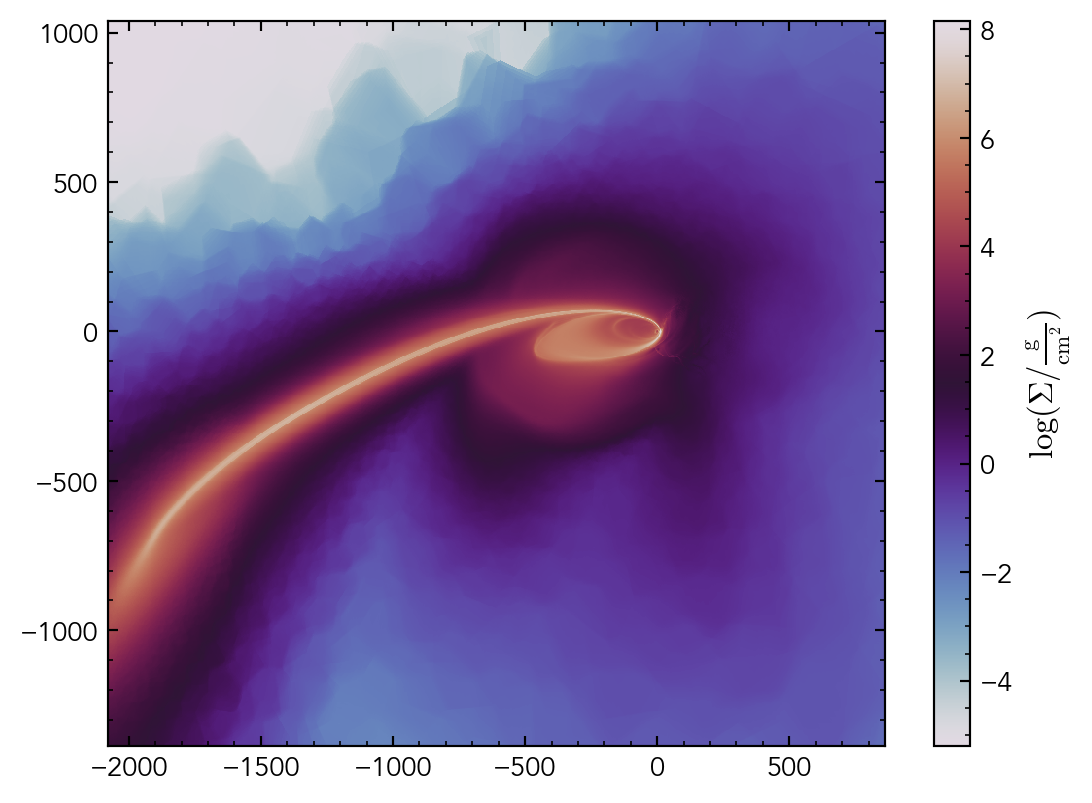

In [ ]:
ax, proj_data = snap.plots.projection(data='density', 
                                      x='CMx', 
                                      y='CMy', 
                                      z='CMz', 
                                      res=(800, 800, 100),
                                      box_size=big_box
                                    )

## Slicing

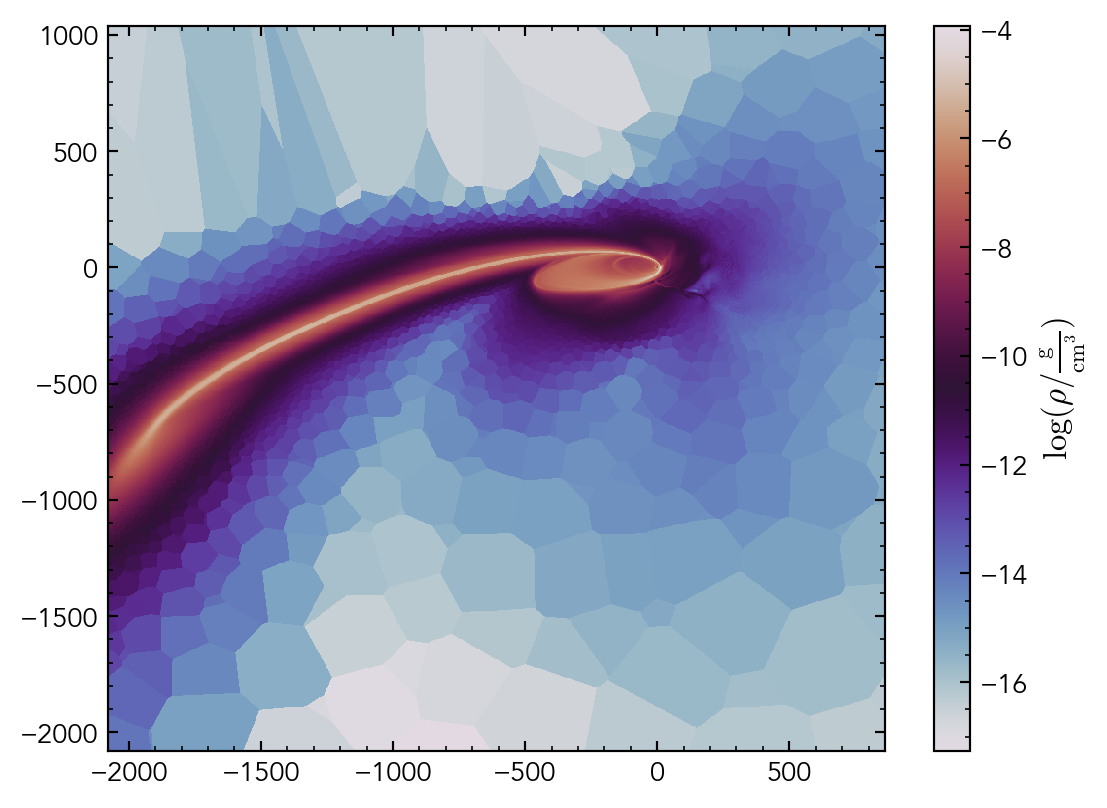

In [ ]:
ax, slice_data3 = snap.plots.slice(data='density', 
                                    x='CMx', 
                                    y='CMy', 
                                    z='CMz', 
                                    res=(800, 800),
                                    box_size=big_box,
                                    plane='xy',
                                    slice_coord=0*richio.units.lscale,
                                    # selection=snap.mask_star_ratio(),
                                    # cmap='inferno',
                                    label_latex='\\rho'
                                    )
plt.show()

## Nozzle region

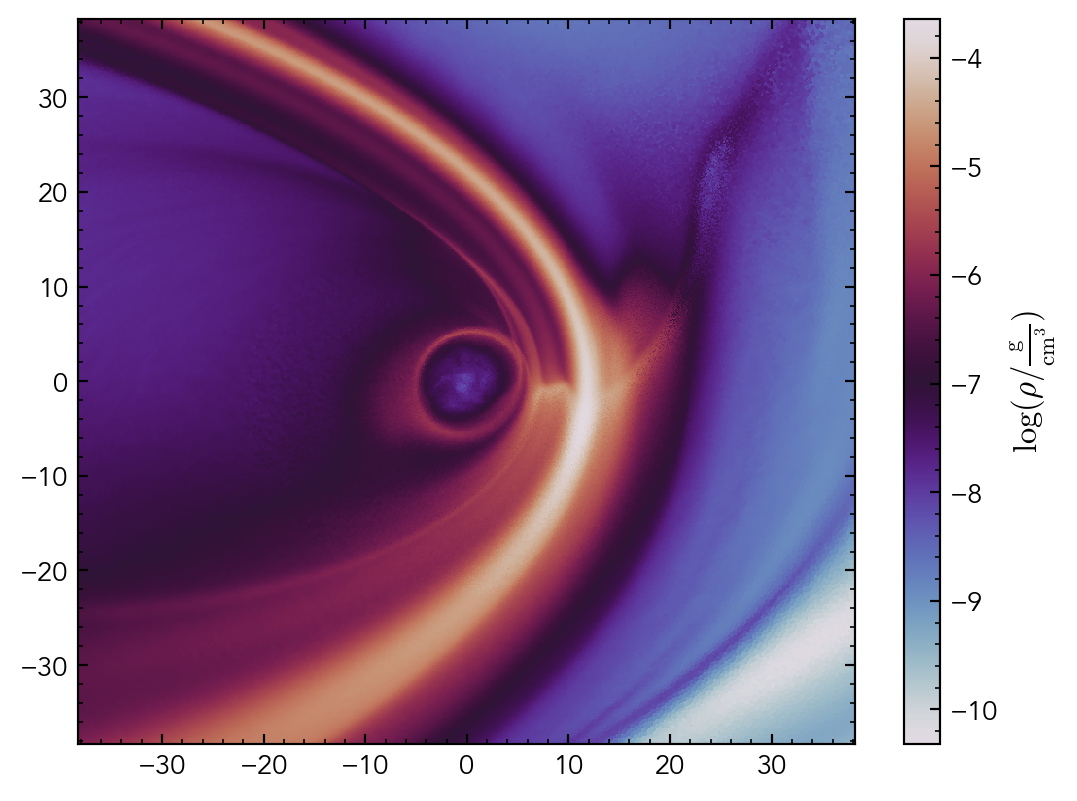

In [ ]:
ax, _ = snap.plots.slice(data='density', 
                          x='CMx', 
                          y='CMy', 
                          z='CMz', 
                          res=(800, 800),
                          box_size=nozzle_box,
                          plane='xy',
                          slice_coord=0*richio.units.lscale,
                          )
plt.show()

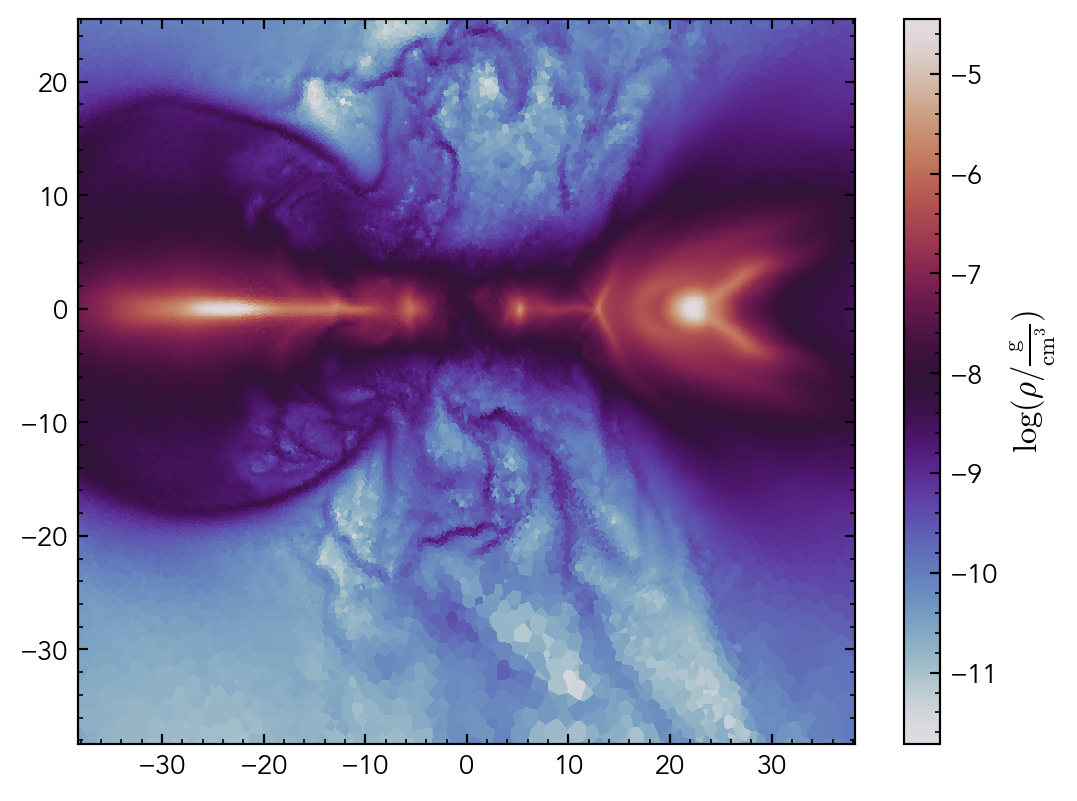

In [ ]:
ax, _ = snap.plots.slice(data='density', 
                          x='CMx', 
                          y='CMy', 
                          z='CMz', 
                          res=(800, 800),
                          box_size=nozzle_box,
                          plane='yz',
                          slice_coord=0*richio.units.lscale,
                          )
plt.show()

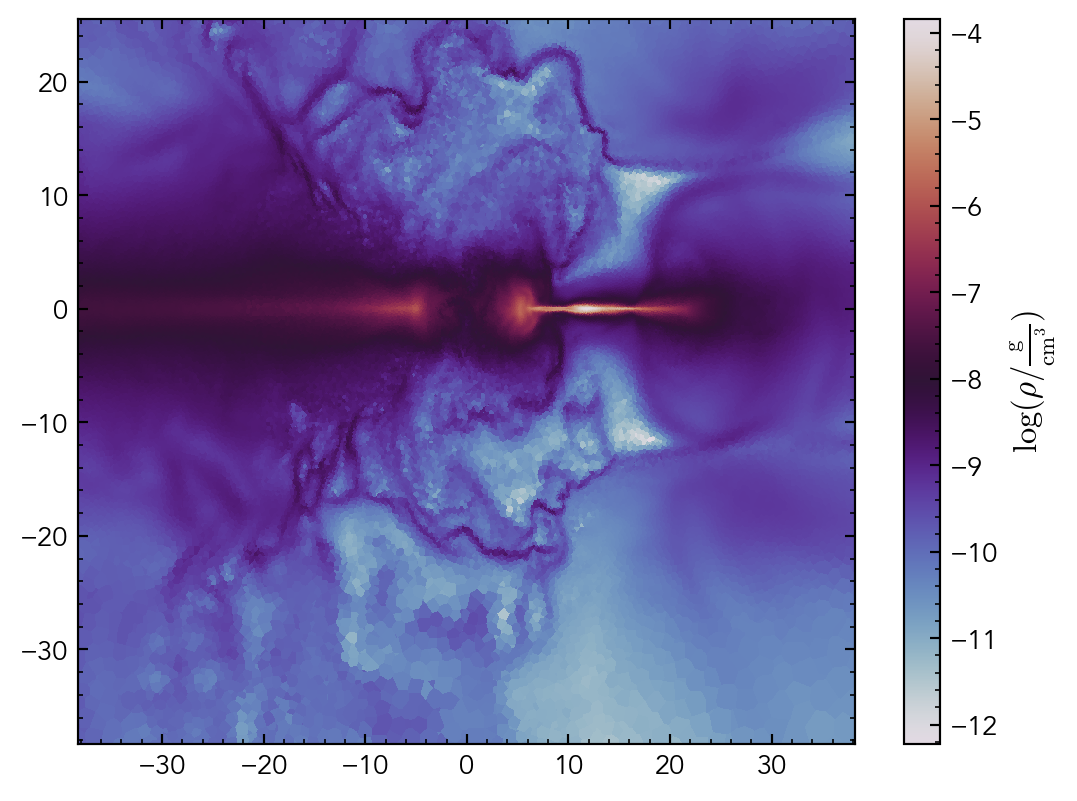

In [ ]:
ax, _ = snap.plots.slice(data='density', 
                          x='CMx', 
                          y='CMy', 
                          z='CMz', 
                          res=(800, 800),
                          box_size=nozzle_box,
                          plane='xz',
                          slice_coord=0*richio.units.lscale,
                          )
plt.show()

## Temperature Slices

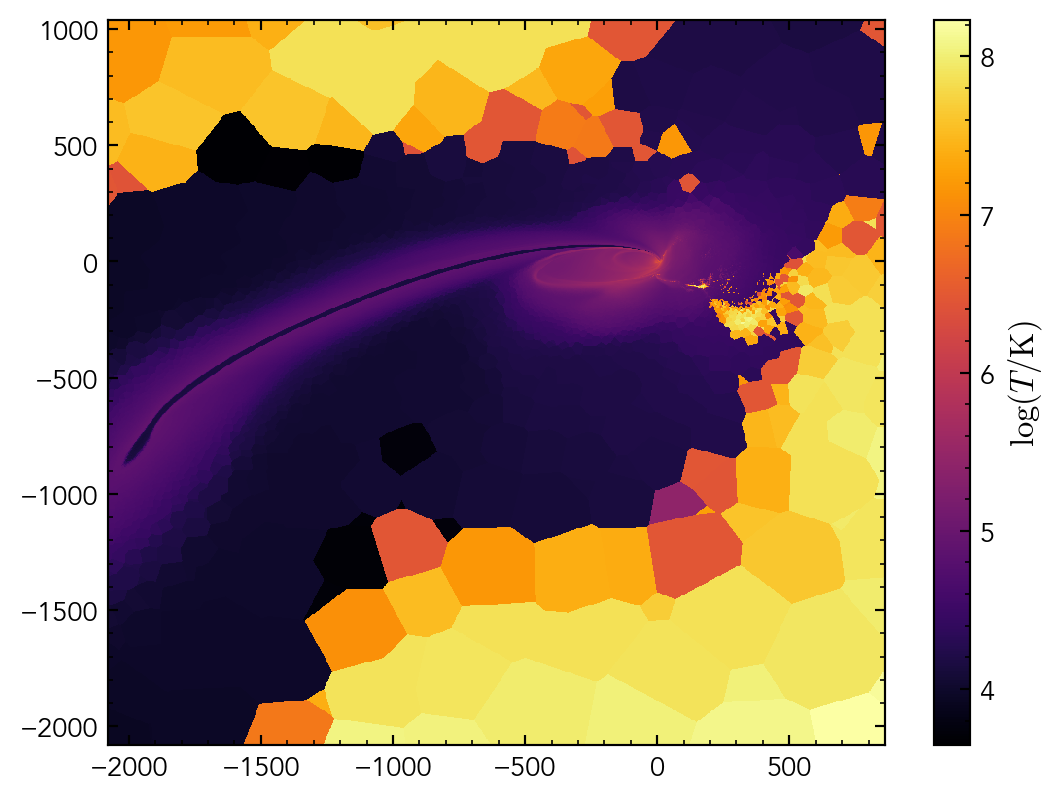

In [ ]:
ax, _ = snap.plots.slice(data='temperature', 
                                    x='CMx', 
                                    y='CMy', 
                                    z='CMz', 
                                    res=(800, 800),
                                    box_size=big_box,
                                    plane='xy',
                                    slice_coord=0*richio.units.lscale,
                                    # selection=snap.mask_star_ratio(),
                                    cmap='inferno',
                                    label_latex='T'
                                    )
plt.show()

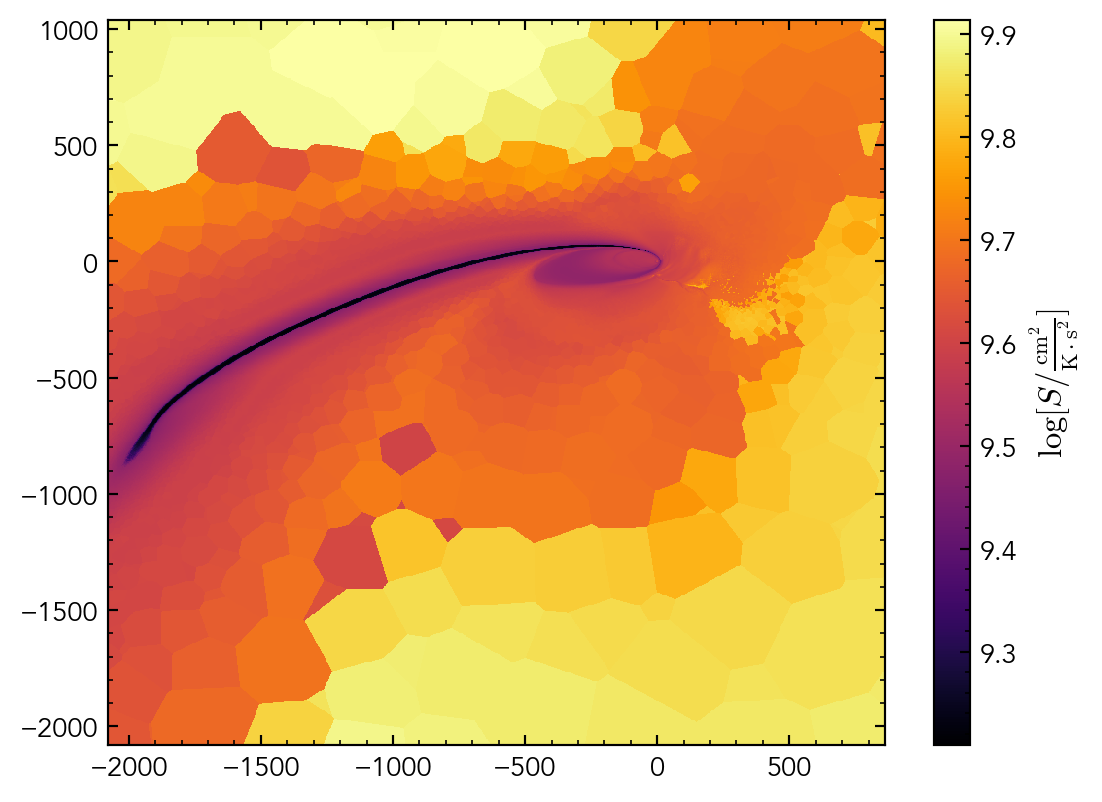

In [8]:
ax, _ = snap.plots.slice(data='entropy', 
                                    x='CMx', 
                                    y='CMy', 
                                    z='CMz', 
                                    res=(800, 800),
                                    box_size=big_box,
                                    plane='xy',
                                    slice_coord=0*richio.units.lscale,
                                    # selection=snap.mask_star_ratio(),
                                    cmap='inferno',
                                    label_latex='S'
                                    )
plt.show()

## Dissipation rate projection

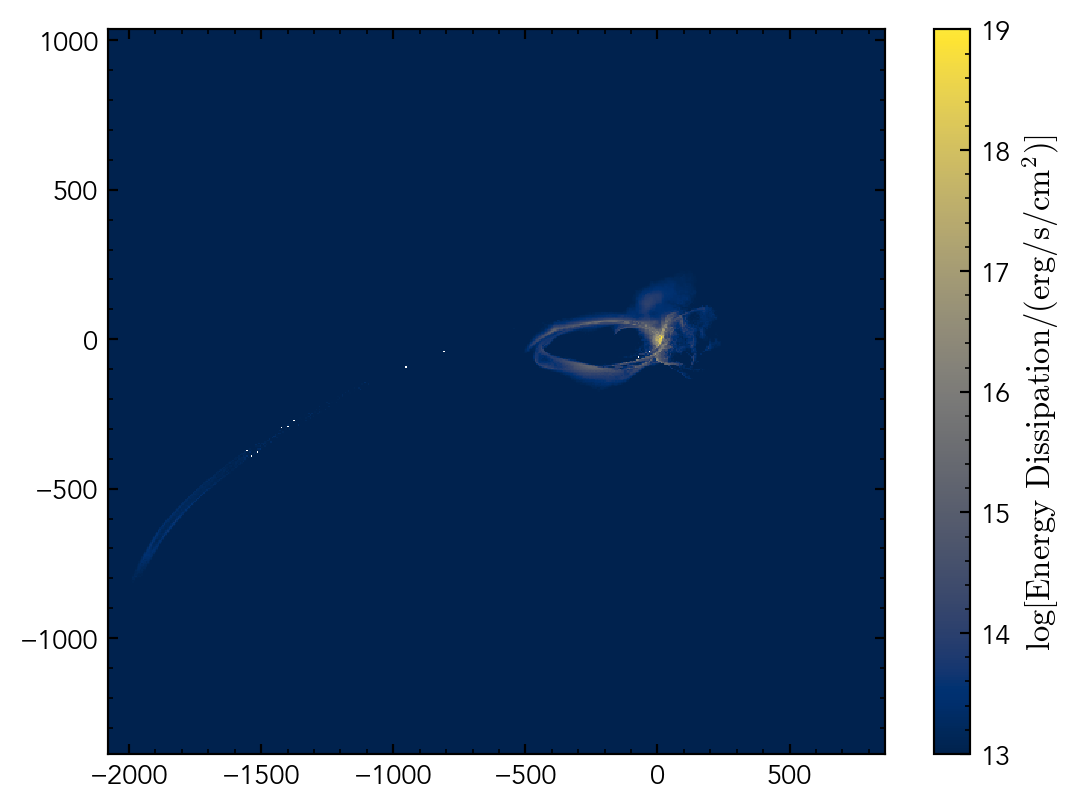

In [6]:
ax, proj_data = snap.plots.projection(data=snap.dissipation, 
                                      x='CMx', 
                                      y='CMy', 
                                      z='CMz', 
                                      res=(512, 512, 512),
                                      box_size=big_box,
                                      label_latex=r'\text{Energy Dissipation}',
                                      unit_latex=r'\mathrm{(erg/s/cm^2)}',
                                      cmap='cividis',
                                      vmin=13,
                                      vmax=19,
                                    )

In [8]:
np.sum(snap.dissipation <= 0)

np.int64(14166379)

In [19]:
u.unyt_quantity(1, 'erg/s/cm**2').in_units('g/s**3')

unyt_quantity(1., 'g/s**3')

## Radiation energy density projection

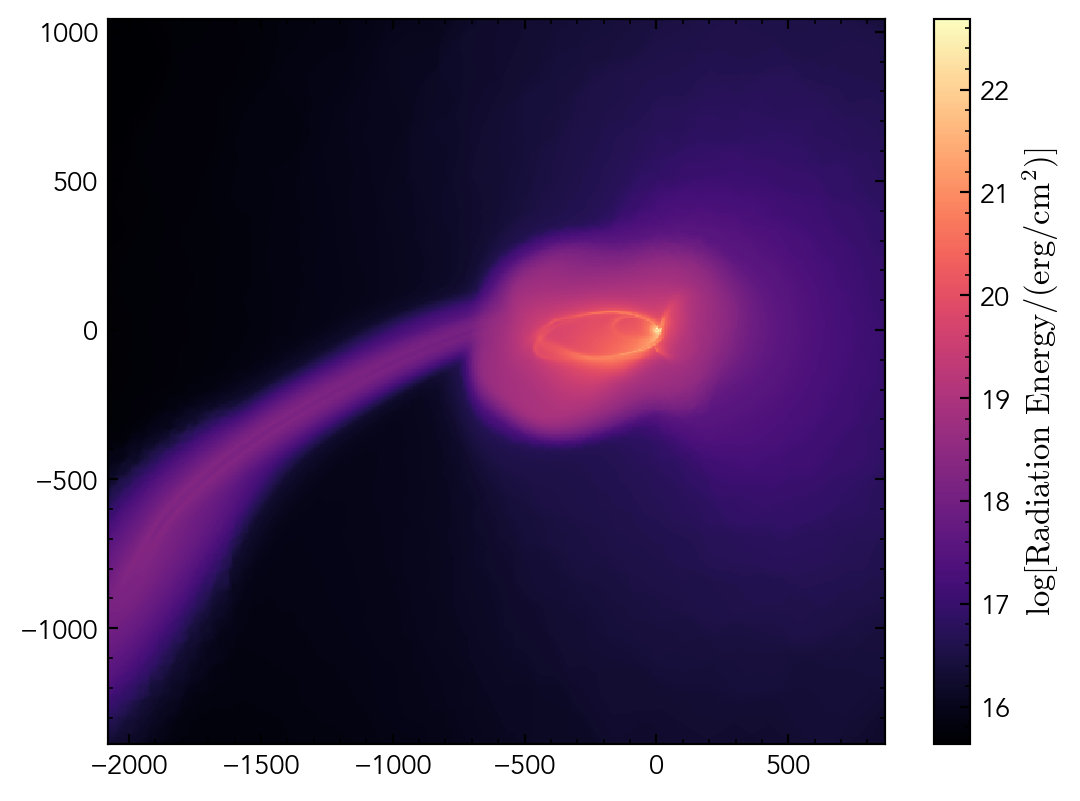

In [5]:
ax, proj_data = snap.plots.projection(data=snap.radiation_energy * snap.density, 
                                      x='CMx', 
                                      y='CMy', 
                                      z='CMz', 
                                      res=(512, 512, 512),
                                      box_size=big_box,
                                      label_latex=r'\text{Radiation Energy}',
                                      unit_latex=r'\mathrm{(erg/cm^2)}',
                                      cmap='magma'
                                    )
